In [1]:
#sklearn建模流程
#实例化，建立评估模型对象   通过模型接口训练模型   通过模型接口提取所需要的信息
#criterion 计算不纯度的计算方法 “entropy信息熵” “Gini” 子节点不纯度一定低于父节点

构建决策树实例

In [2]:
#导入算法模块
from sklearn import tree
from  sklearn.datasets import  load_wine
from sklearn.model_selection import train_test_split

In [3]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [5]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
wine.data.shape

(178, 13)

In [7]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)  #pd.concat

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [8]:
wine.feature_names #feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
Xtrain , Xtest , Ytrain , Ytest  = train_test_split(wine.data,wine.target,test_size=0.3)

In [11]:
Xtrain

array([[1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02],
       [1.237e+01, 1.070e+00, 2.100e+00, ..., 1.040e+00, 2.770e+00,
        6.600e+02],
       [1.229e+01, 1.410e+00, 1.980e+00, ..., 1.230e+00, 2.740e+00,
        4.280e+02],
       ...,
       [1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.362e+01, 4.950e+00, 2.350e+00, ..., 9.100e-01, 2.050e+00,
        5.500e+02],
       [1.281e+01, 2.310e+00, 2.400e+00, ..., 6.600e-01, 1.360e+00,
        5.600e+02]])

In [12]:
Xtest

array([[1.340000e+01, 3.910000e+00, 2.480000e+00, 2.300000e+01,
        1.020000e+02, 1.800000e+00, 7.500000e-01, 4.300000e-01,
        1.410000e+00, 7.300000e+00, 7.000000e-01, 1.560000e+00,
        7.500000e+02],
       [1.187000e+01, 4.310000e+00, 2.390000e+00, 2.100000e+01,
        8.200000e+01, 2.860000e+00, 3.030000e+00, 2.100000e-01,
        2.910000e+00, 2.800000e+00, 7.500000e-01, 3.640000e+00,
        3.800000e+02],
       [1.324000e+01, 2.590000e+00, 2.870000e+00, 2.100000e+01,
        1.180000e+02, 2.800000e+00, 2.690000e+00, 3.900000e-01,
        1.820000e+00, 4.320000e+00, 1.040000e+00, 2.930000e+00,
        7.350000e+02],
       [1.270000e+01, 3.550000e+00, 2.360000e+00, 2.150000e+01,
        1.060000e+02, 1.700000e+00, 1.200000e+00, 1.700000e-01,
        8.400000e-01, 5.000000e+00, 7.800000e-01, 1.290000e+00,
        6.000000e+02],
       [1.388000e+01, 1.890000e+00, 2.590000e+00, 1.500000e+01,
        1.010000e+02, 3.250000e+00, 3.560000e+00, 1.700000e-01,
        1.70

In [13]:
#建模实例化
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=11,splitter='random')
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.9074074074074074

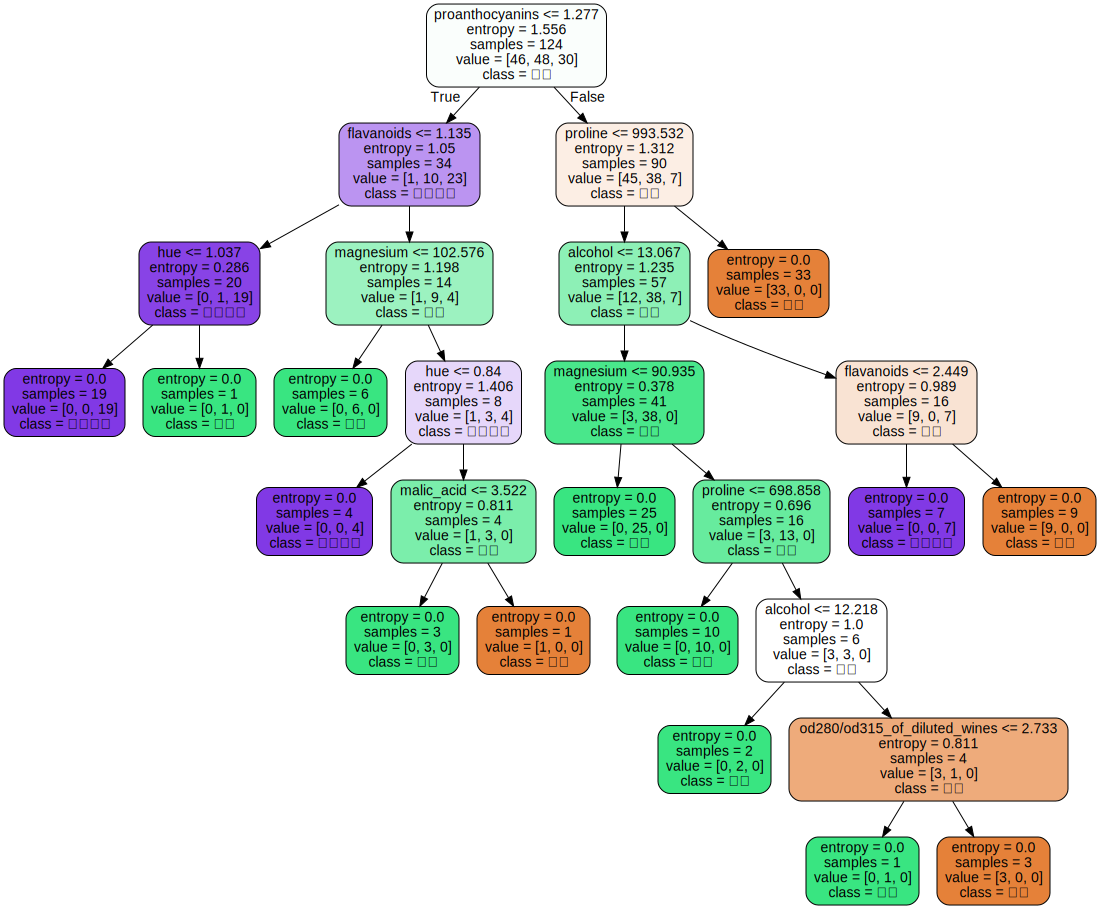

In [14]:
import graphviz
dot_data = tree.export_graphviz(
                                clf
                                ,feature_names= wine.feature_names
                                ,class_names = ['琴酒','雪梨','贝尔摩德']
                                ,filled=True #颜色补充，不纯度越低颜色越深
                                ,rounded=True #圆角
)
graph = graphviz.Source(dot_data)
graph

In [15]:
clf.feature_importances_

array([0.21681424, 0.01681827, 0.        , 0.        , 0.05116638,
       0.        , 0.15045297, 0.        , 0.20304776, 0.        ,
       0.07114707, 0.01681827, 0.27373503])

In [16]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.21681423803886388),
 ('malic_acid', 0.016818274245519255),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.05116638427254896),
 ('total_phenols', 0.0),
 ('flavanoids', 0.1504529735919711),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.20304775772097192),
 ('color_intensity', 0.0),
 ('hue', 0.07114706977808809),
 ('od280/od315_of_diluted_wines', 0.016818274245519255),
 ('proline', 0.27373502810651745)]

#剪枝

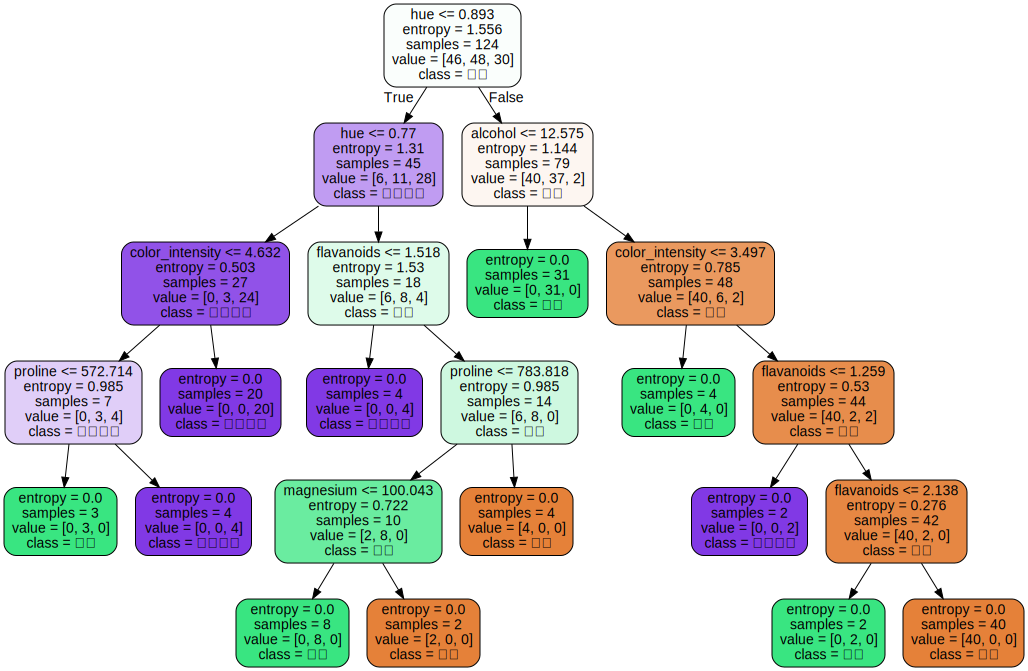

In [17]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=27
                                  ,splitter='random'
                                  ,max_depth= 5
                                  # ,min_samples_split= 5
                                  # ,min_samples_leaf=1
)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
dot_data = tree.export_graphviz(
    clf
    ,feature_names= wine.feature_names
    ,class_names = ['琴酒','雪梨','贝尔摩德']
    ,filled=True #颜色补充，不纯度越低颜色越深
    ,rounded=True #圆角
)
graph = graphviz.Source(dot_data)
graph

In [18]:
score

0.9629629629629629

In [19]:
#max_depth 限制树的深度，建议从3开始尝试
#min_samples_leaf: 每个子节点都需要包含多少个训练样本 与 max_depth搭配使用 建议等于5开始使用，样布不均衡使用小数 类别不多时1通常为最佳选择
#min_samples_split

##超参数的学习曲线

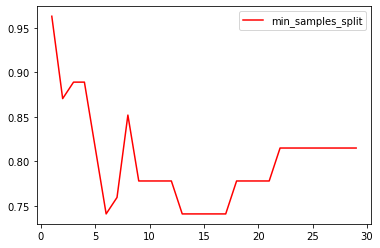

In [23]:
import matplotlib.pyplot as plt
test = []
for i in  range(1,30):
            clf = tree.DecisionTreeClassifier(criterion='entropy'
                                              ,random_state=27
                                              ,splitter='random'
                                              ,max_depth= 5
                                              # ,min_samples_split= 5
                                              # ,min_samples_leaf=i+1
                                              )
            clf = clf.fit(Xtrain,Ytrain)
            score = clf.score(Xtest,Ytest)
            test.append(score)
plt.plot(range(1,30),test,color = 'red',label = 'min_samples_split')
plt.legend()
plt.show()

In [21]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  ,random_state=35
                                  ,splitter='random'
                                  ,max_depth= 6
                                  # ,min_samples_split= 5
                                  ,min_samples_leaf=5
                                  )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
dot_data = tree.export_graphviz(
    clf
    ,feature_names= wine.feature_names
    ,class_names = ['琴酒','雪梨','贝尔摩德']
    ,filled=True #颜色补充，不纯度越低颜色越深
    ,rounded=True #圆角
)
graph = graphviz.Source(dot_data)
graph,score

(<graphviz.files.Source at 0x208af616088>, 0.9074074074074074)

In [22]:
# class_weight:默认None，所有标签具有相同的权重，向少数类方向建模
# min_weight_fraction_leaf基于权重的剪枝参数

In [22]:
#重要属性与接口
# feature_names

# 必须至少两维特征,不接受一维矩阵
# fit
# score
# apply 返回叶子结点的索引
# predict 返回每个样本的分类回归结果
# 找特征-计算不纯度-分-找特征-计算不纯度-分